# Week 9 - Assignment. Due Week 10

### 1.  Plot confusion matrix of the FOUR classifiers and calculate the accuracy, precision, recall, F-score of these classifiers using the confusion matrix (30 points)

In [1]:
from sklearn.model_selection import train_test_split # this function provides a single "Hold-Out" Validation.
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score #similar to MAE, we use accuracy_score evaluation metric.
import pandas as pd
import numpy as np
data = pd.read_csv('Credit_approval.csv',header='infer')
data.head(5)

,Age,Debt,YearsEmployed,CreditScore,Income,Approved
0,30.83,0.000,1.25,1,0,+
1,58.67,4.460,3.04,6,560,+
2,24.50,0.500,1.50,0,824,+
3,27.83,1.540,3.75,5,3,+
4,20.17,5.625,1.71,0,0,+


In [2]:
Y = data['Approved'] #this is our prediction target
X = data.drop(['Approved'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1) 

## 0. Decision Tree Classifier

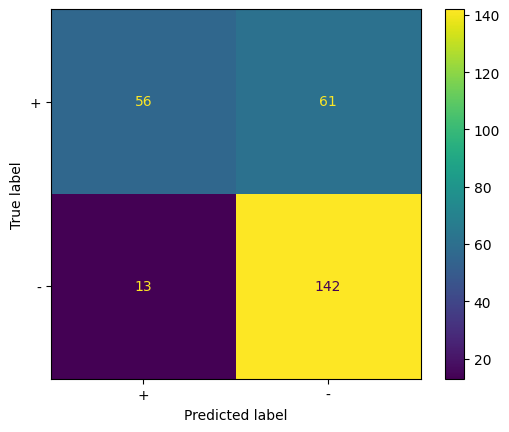

0.47863247863247865
Accuracy is 0.727941
Precision is 0.811594
Recall is 0.478632
F score is 0.602151


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import numpy as np

clf = DecisionTreeClassifier(max_depth=2) # number estimators is the key parameter
clf = clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
cm = confusion_matrix(Y_test, Y_predTest, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

acc = (cm[0][0] + cm[-1][-1]) / np.sum(cm)
precision = cm[0][0] / (cm[0][0]+cm[1][0])
recall = cm[0][0] / (cm[0][0]+cm[0][1])
F_score = 2*precision*recall / (precision+recall)
print(56/117)
print('Accuracy is %f' %acc)
print('Precision is %f' %precision)
print('Recall is %f' %recall)
print('F score is %f' %F_score)

## 1. Random Forest 

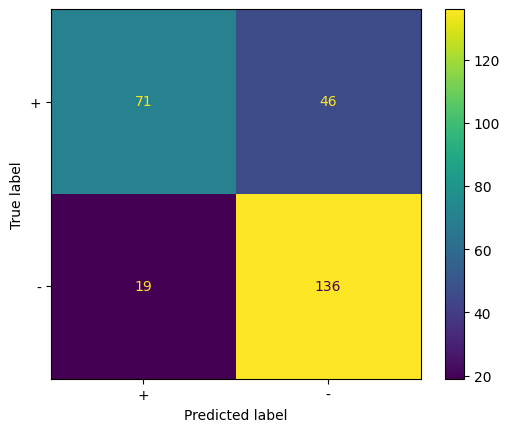

Accuracy is 0.761029
Precision is 0.788889
Recall is 0.606838
F score is 0.685990


In [4]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2,n_estimators=500)
clf = clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
cm = confusion_matrix(Y_test, Y_predTest, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

acc = (cm[0][0] + cm[-1][-1]) / np.sum(cm)
precision = cm[0][0] / (cm[0][0]+cm[1][0])
recall = cm[0][0] / (cm[0][0]+cm[0][1])
F_score = 2*precision*recall / (precision+recall)
print('Accuracy is %f' %acc)
print('Precision is %f' %precision)
print('Recall is %f' %recall)
print('F score is %f' %F_score)

## 2. Bagging

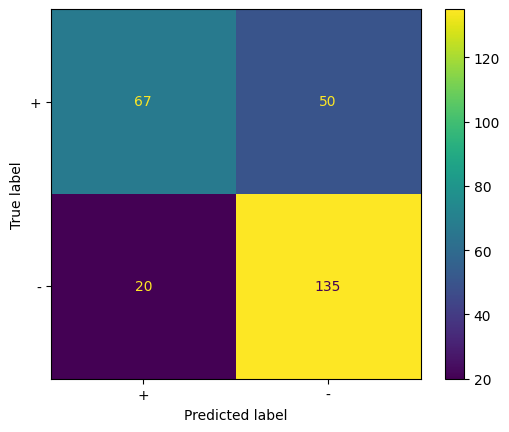

Accuracy is 0.742647
Precision is 0.770115
Recall is 0.572650
F score is 0.656863


In [5]:
from sklearn.ensemble import BaggingClassifier
clf2 = BaggingClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=50) # number estimators is the key parameter
clf2 = clf2.fit(X_train, Y_train)
Y_predTrain = clf2.predict(X_train)
Y_predTest = clf2.predict(X_test)
cm = confusion_matrix(Y_test, Y_predTest, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

acc = (cm[0][0] + cm[-1][-1]) / np.sum(cm)
precision = cm[0][0] / (cm[0][0]+cm[1][0])
recall = cm[0][0] / (cm[0][0]+cm[0][1])
F_score = 2*precision*recall / (precision+recall)
print('Accuracy is %f' %acc)
print('Precision is %f' %precision)
print('Recall is %f' %recall)
print('F score is %f' %F_score)

## 3. AdaBoost

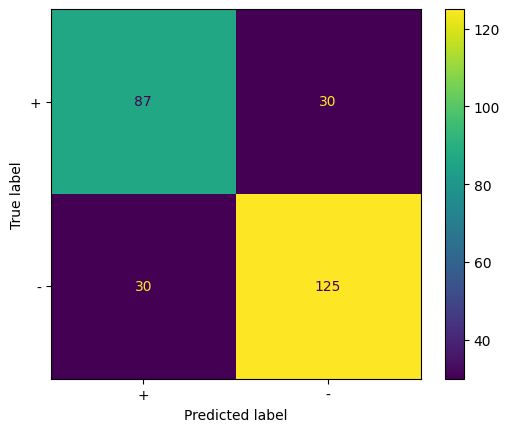

Accuracy is 0.779412
Precision is 0.743590
Recall is 0.743590
F score is 0.743590


In [6]:
from sklearn.ensemble import AdaBoostClassifier
clf3 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=5) # number estimators is the key parameter
clf3 = clf3.fit(X_train, Y_train)
Y_predTrain = clf3.predict(X_train)
Y_predTest = clf3.predict(X_test)
cm = confusion_matrix(Y_test, Y_predTest, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

acc = (cm[0][0] + cm[-1][-1]) / np.sum(cm)
precision = cm[0][0] / (cm[0][0]+cm[1][0])
recall = cm[0][0] / (cm[0][0]+cm[0][1])
F_score = 2*precision*recall / (precision+recall)
print('Accuracy is %f' %acc)
print('Precision is %f' %precision)
print('Recall is %f' %recall)
print('F score is %f' %F_score)

### 2.  Illustrate the differences between these classifiers and compare the model performances. (30 points)

i. Decision tree classifier breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. It is fast and easy to apply, but prone to overfitting when the depth of tree is large. The precision of it on this dataset is high, but accuracy is not so much good.

ii. Random Forest is an ensemble method that combines multiple decision trees to make decisions. It creates a large number of decision trees and aggregates the outputs of these trees to make a final decision. Random Forest can help reduce overfitting and improve the accuracy of the classification model. On this dataset, it improves the overall accuracy.

iii. Bagging is a general-purpose ensemble method that aims to reduce the variance of a single classifier by creating multiple independent copies of the original dataset and training a separate classifier on each. On this dataset, it gets a more average result.

IV. AdaBoost is another ensemble method that combines multiple weak classifiers to make a strong classifier. AdaBoost works by assigning weights to each sample in the dataset and iteratively training a new weak classifier on a modified version of the dataset that puts more weight on the misclassified samples. The final classification is based on the weighted majority vote of the individual classifiers. On this dataset, it performes well in terms of Recall.

### 3.  Use the credictcard-reduced.csv dataset ([Data description](https://www.kaggle.com/mlg-ulb/creditcardfraud)) and build Five classification models. Please evaluate your model performance (40 points). A list of classification models can be found [here](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

In [7]:
data = pd.read_csv('creditcard-reduced.csv',header='infer')
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [8]:
Y = data['Class'] #this is our prediction target
X = data.drop(['Class'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1) 

### 1. Random Forest

Validation accuracy is 0.999237


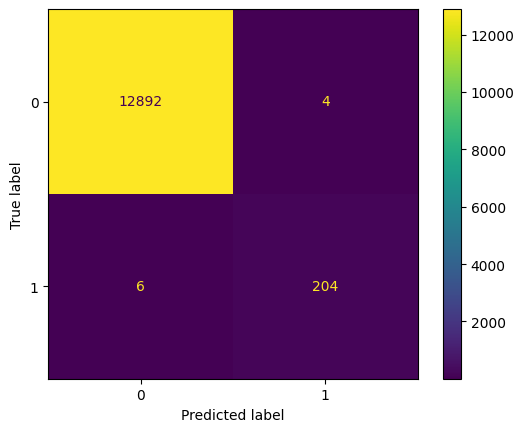

In [9]:
clf = RandomForestClassifier(max_depth=5,n_estimators=10)
clf = clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
cm = confusion_matrix(Y_test, Y_predTest, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
print('Validation accuracy is %f' %accuracy_score(Y_test, Y_predTest))
disp.plot()
plt.show()

### 2. Bagging

Validation accuracy is 0.999313


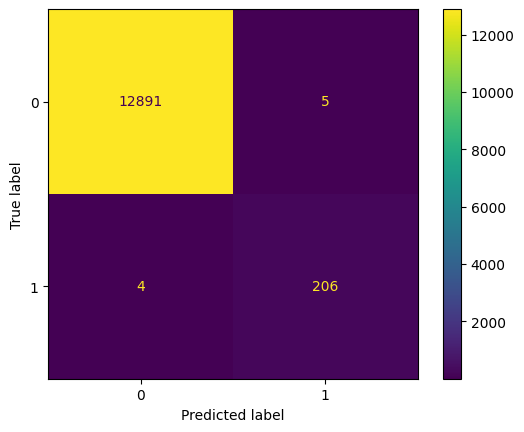

In [10]:
clf2 = BaggingClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=10) # number estimators is the key parameter
clf2 = clf2.fit(X_train, Y_train)
Y_predTrain = clf2.predict(X_train)
Y_predTest = clf2.predict(X_test)
cm = confusion_matrix(Y_test, Y_predTest, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
print('Validation accuracy is %f' %accuracy_score(Y_test, Y_predTest))
disp.plot()
plt.show()

### 3. adaboost

Validation accuracy is 0.999618


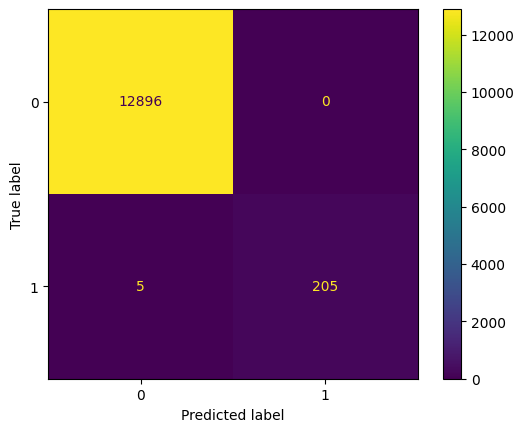

In [11]:
clf3 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=10) # number estimators is the key parameter
clf3 = clf3.fit(X_train, Y_train)
Y_predTrain = clf3.predict(X_train)
Y_predTest = clf3.predict(X_test)
cm = confusion_matrix(Y_test, Y_predTest, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
print('Validation accuracy is %f' %accuracy_score(Y_test, Y_predTest))
disp.plot()
plt.show()

### 4. Linear SVM

Validation accuracy is 0.998398


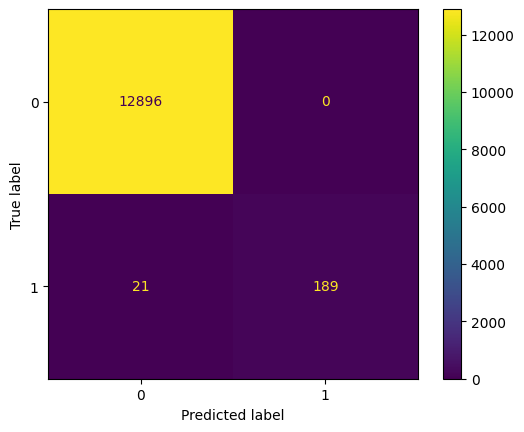

In [12]:
from sklearn.svm import SVC
clf4 = SVC(kernel="linear", C=0.025)
clf4 = clf4.fit(X_train, Y_train)
Y_predTrain = clf4.predict(X_train)
Y_predTest = clf4.predict(X_test)
cm = confusion_matrix(Y_test, Y_predTest, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
print('Validation accuracy is %f' %accuracy_score(Y_test, Y_predTest))
disp.plot()
plt.show()

### 5. QuadraticDiscriminantAnalysis

Validation accuracy is 0.984511


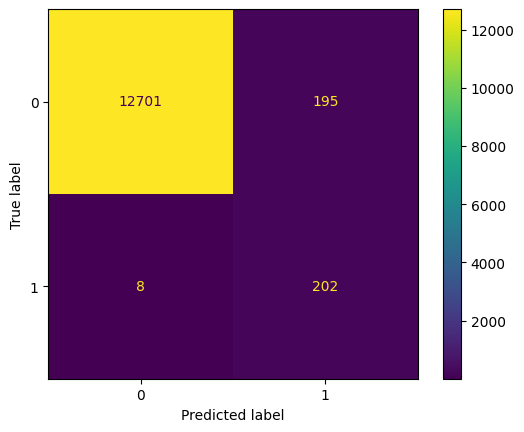

In [13]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf5 = QuadraticDiscriminantAnalysis()
clf5 = clf5.fit(X_train, Y_train)
Y_predTrain = clf5.predict(X_train)
Y_predTest = clf5.predict(X_test)
cm = confusion_matrix(Y_test, Y_predTest, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
print('Validation accuracy is %f' %accuracy_score(Y_test, Y_predTest))
disp.plot()
plt.show()

### 4.  Bonus credits (extra 1/100 points to Final GPA calculation):

Learn from the documentation for [imbalanced classification](https://imbalanced-learn.org/stable/auto_examples/index.html#general-examples) and use any of the sampling methods to deal with the credictcard-reduced.csv dataset. Evaluate model performance.

0    210
1    210
Name: Class, dtype: int64
Validation accuracy is 0.990476


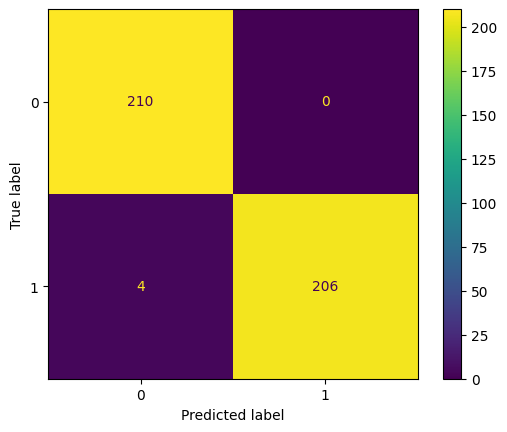

In [14]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

X_resampled, Y_resampled = rus.fit_resample(X_test, Y_test)

print(pd.Series(Y_resampled).value_counts())

clf3 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=10) # number estimators is the key parameter
clf3 = clf3.fit(X_train, Y_train)
Y_predTest = clf3.predict(X_resampled)
cm = confusion_matrix(Y_resampled, Y_predTest, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
print('Validation accuracy is %f' %accuracy_score(Y_resampled, Y_predTest))
disp.plot()
plt.show()